# Lec 05. NonLinear Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Generating Data

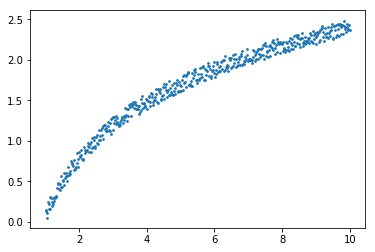

In [3]:
x = torch.linspace(1, 10, 500)
y = x.log() + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy(), s=3)
plt.show()

In [4]:
x.shape, y.shape

(torch.Size([500]), torch.Size([500]))

In [5]:
x = torch.unsqueeze(x, dim=1)   # 차원 설정
y = torch.unsqueeze(y, dim=1)

x.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

## Define Model

In [6]:
model = nn.Linear(1, 1, bias=True)

loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

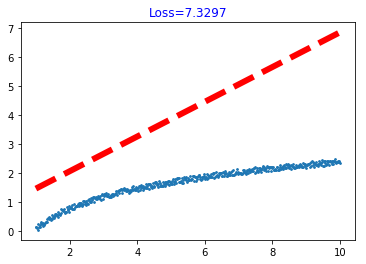

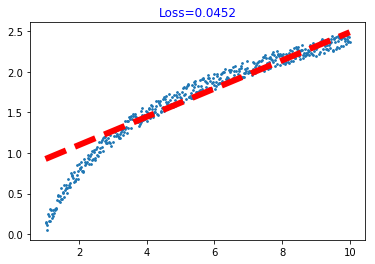

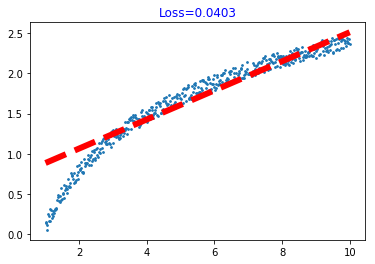

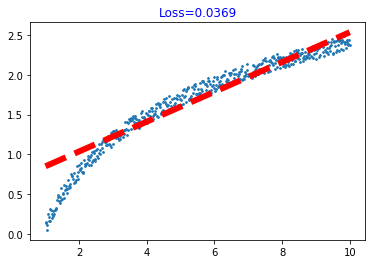

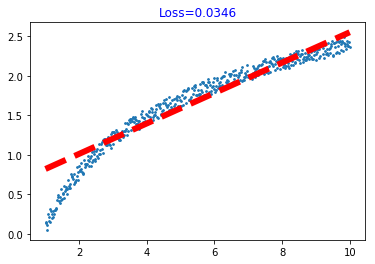

In [7]:
for t in range(220):
    pred = model(x)
    cost = loss(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if t % 50 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy(), s=3)
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r--', lw=6)
        plt.title('Loss=%.4f' % cost.item(), fontdict={'size':12, 'color':'b'})
        plt.show()

In [8]:
x.shape, y.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

In [9]:
len(y.data.numpy())

500

## Data Transformation with Log-scale

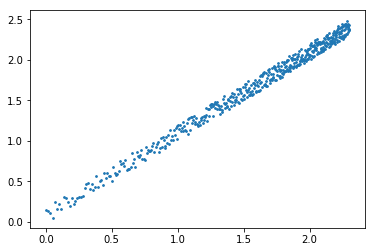

In [10]:
x2 = x.log()
plt.scatter(x2.data.numpy(), y.data.numpy(), s=3)
plt.show()

In [11]:
model = nn.Linear(1, 1, bias=True)

loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

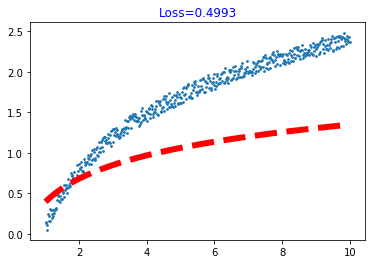

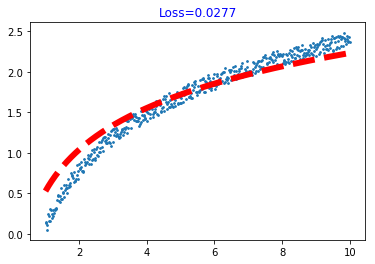

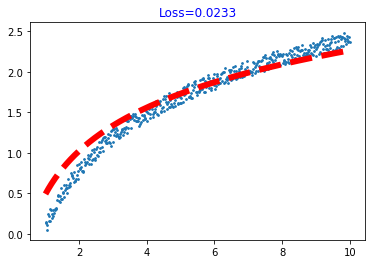

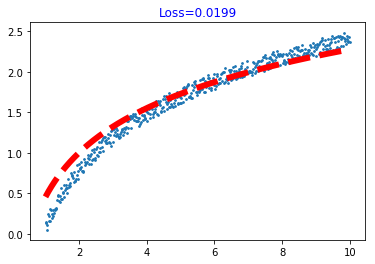

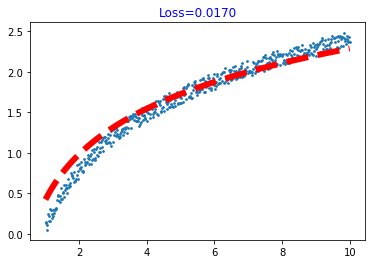

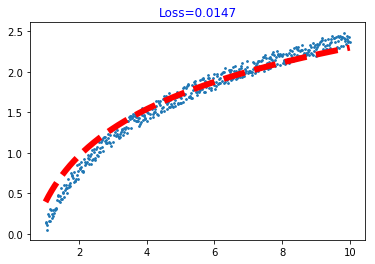

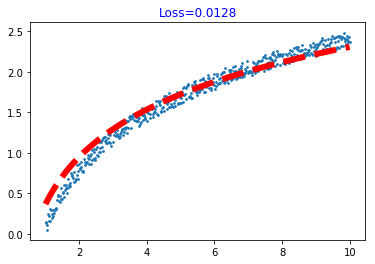

In [12]:
for t in range(301):
    pred = model(x2)
    cost = loss(pred, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if t % 50 == 0:
        plt.scatter(x2.exp().data.numpy(), y.data.numpy(), s=3)
        plt.plot(x2.exp().data.numpy(), pred.data.numpy(), 'r--', lw=6)
        plt.title('Loss=%.4f' % cost.item(), fontdict={'size':12, 'color':'b'})
        plt.show()